In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/vimalkumar/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [6]:
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df['region'] = lb.fit_transform(df['region'])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
x_ind = df.iloc[:,:-1]
x_ind

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [9]:
y_dep = df.iloc[:,-1]
y_dep

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,random_state=10,test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
y_test


7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
           ...     
271     42856.83800
695      3201.24515
1039    22493.65964
323     11566.30055
835      7160.33030
Name: charges, Length: 268, dtype: float64

In [28]:
com = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
com.head()

,Actual,Predicted
7,7281.50560,8039.033567
999,5267.81815,5851.810666
1209,12347.17200,15121.877793
491,24513.09126,11469.475136
625,3736.46470,3738.841864


In [42]:
com_head = com.head(30)
com_head

,Actual,Predicted
7,7281.50560,8039.033567
999,5267.81815,5851.810666
1209,12347.17200,15121.877793
491,24513.09126,11469.475136
625,3736.46470,3738.841864
228,7358.17565,9586.042806
425,9788.86590,9507.614588
261,17085.26760,26051.466317
498,8211.10020,7763.056111
896,19798.05455,30735.586458


<AxesSubplot:>

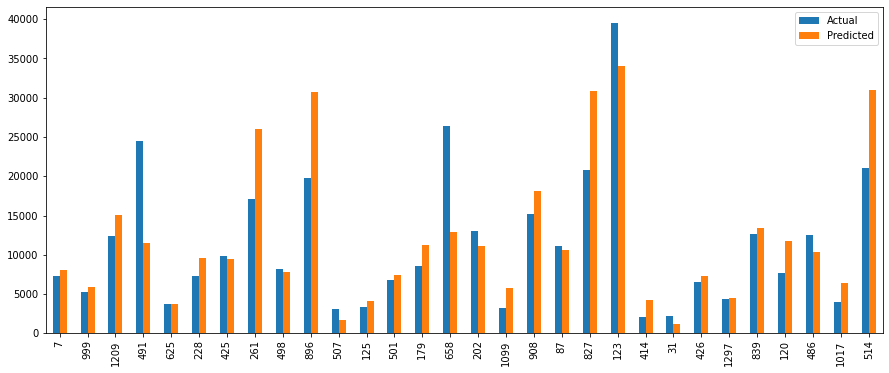

In [44]:
com_head.plot(kind='bar',figsize=(15,6))

In [46]:
com['error'] = com['Actual']-com['Predicted']
com.head()

,Actual,Predicted,error
7,7281.50560,8039.033567,-757.527967
999,5267.81815,5851.810666,-583.992516
1209,12347.17200,15121.877793,-2774.705793
491,24513.09126,11469.475136,13043.616124
625,3736.46470,3738.841864,-2.377164


In [50]:
from math import *

In [53]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(com['Actual'],com['Predicted']))
rmse

6532.850706526632